In [24]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [11]:
quandl.ApiConfig.api_key = 'sGjjBSV1sEQqBABcvHbW'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


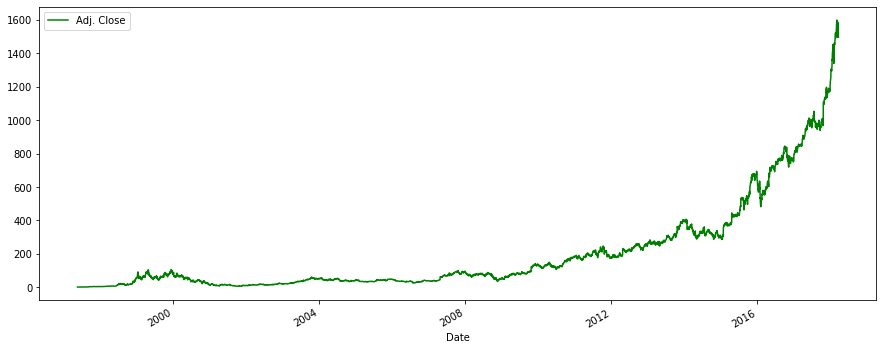

In [13]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [20]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1499.02100365 1537.8262541  1549.20020682 1535.31994893 1556.19874542
 1571.67199389 1573.62606233 1589.81084658 1613.12160869 1602.53353132
 1603.03266837 1582.85478773 1590.07634501 1614.88451826 1629.78429012
 1637.60056388 1644.88584079 1673.59153098 1694.30040847 1683.45745262
 1686.4522749  1677.23416943 1665.93455627 1637.52622432 1681.68392311
 1676.74565232 1636.64476954 1585.09559448 1649.13381566 1586.67796512]


(736445.0, 736811.0)

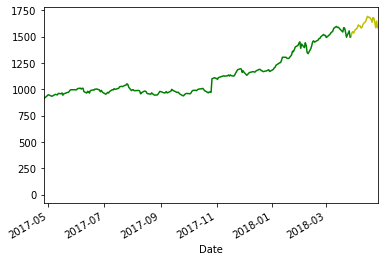

In [26]:
dates = pd.date_range(start="2018-03-28", end = "2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))
plt.xlim(xmax=datetime.date(2018,4,27))